# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("seaborn")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320235 entries, 0 to 2320234
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21066
Address                             12
Zip Code                         14336
Council District                 47434
APD Sector                        9124
APD District                      9605
PRA                              10881
Census Tract                    774667
Clearance Status                607932
Clearance Date                  338737
UCR Category                   1527567
Category Description           1527567
X-coordinate                     10286
Y-coordinate                     10286
Latitude                         39240
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2320230,20143631822,FAMILY DISTURBANCE,3400,N,12/29/2014 11:41:00 PM,12/29/2014,2341.0,12/29/2014 11:41:00 PM,12/29/2014,2341.0,RESIDENCE / HOME,109 MASTERSON PASS,78753.0,4.0,ED,1,240.0,18.23,N,01/02/2015,NaN,NaN,3130776.0,3130776.0,30.369795,-97.687855,"(30.36979494, -97.68785533)"
2320231,20191270738,THEFT BY SHOPLIFTING,607,N,05/07/2019 10:50:00 AM,05/07/2019,1050.0,05/07/2019 11:31:00 AM,05/07/2019,1131.0,DEPARTMENT / DISCOUNT STORE,11423 N LAMAR BLVD,78753.0,7.0,ED,4,221.0,18.24,NaN,NaN,23C,Theft,3131578.0,3131578.0,30.383630,-97.684932,"(30.38362955, -97.68493154)"
2320232,2008501470,CRIMINAL TRESPASS/TRANSIENT,2721,N,02/19/2008 05:00:00 PM,02/19/2008,1700.0,02/19/2008 05:00:00 PM,02/19/2008,1700.0,PARKING LOTS / GARAGE,6800 BERKMAN DR,78723.0,1.0,ID,5,293.0,21.00,NaN,NaN,NaN,NaN,3130390.0,3130390.0,30.320281,-97.690437,"(30.32028083, -97.6904366)"
2320233,2003921400113,DWI,2100,N,05/20/2003 01:32:00 AM,05/20/2003,132.0,05/20/2003 01:32:00 AM,05/20/2003,132.0,STREETS / HWY / ROAD / ALLEY,4500 N MOPAC EXPY NB,78731.0,10.0,BA,6,325.0,1.00,C,05/22/2003,NaN,NaN,3109748.0,3109748.0,30.320565,-97.755869,"(30.32056515, -97.7558693)"
2320234,20081340129,URINATING IN PUBLIC PLACE,3212,N,05/13/2008 01:10:00 AM,05/13/2008,110.0,05/13/2008 01:10:00 AM,05/13/2008,110.0,STREETS / HWY / ROAD / ALLEY,400 BLOCK E 6TH ST,78701.0,9.0,GE,2,382.0,11.00,C,05/17/2008,NaN,NaN,3115491.0,3115491.0,30.267351,-97.739093,"(30.26735144, -97.73909331)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

834

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2319401 entries, 2003-01-01 to 2021-03-27
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21055
address                            12
zip_code                        14331
council_district                47416
apd_sector                       9120
apd_district                     9601
clearance_status               607697
clearance_date                 338577
latitude                        39212
longitude                       39212
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,HARASSMENT,N,2003-01-01 02:59:00,RESIDENCE / HOME,1202 E 51ST ST,78723.0,4.0,ID,5,O,2003-01-03,30.308626,-97.707781,2003,1,1,1
2003-01-01,THEFT,N,2003-05-29 11:03:00,RESIDENCE / HOME,3413 LYNRIDGE DR,78723.0,1.0,ID,3,N,NaT,30.315845,-97.664687,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2003-04-07 12:30:00,RESIDENCE / HOME,2707 ZARAGOSA ST,78702.0,3.0,CH,2,N,NaT,30.263672,-97.710081,2003,1,1,1
2003-01-01,CRIMINAL TRESPASS,N,2003-01-01 10:16:00,RESIDENCE / HOME,9036 N LAMAR BLVD,78758.0,4.0,ED,1,N,NaT,30.360305,-97.698874,2003,1,1,1
2003-01-01,ASSAULT WITH INJURY,N,2003-01-01 02:19:00,RESIDENCE / HOME,412 E WILLIAM CANNON DR,78745.0,2.0,FR,4,O,2003-01-07,30.192596,-97.774971,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-03-27,ARSON WITH BODILY INJURY,N,2021-03-27 17:40:00,ABANDONED/CONDEMNED STRUCTURE,8534 S CONGRESS AVE,78748.0,2.0,FR,3,NaN,NaT,30.171765,-97.786120,2021,3,12,27
2021-03-27,RECKLESS DAMAGE,N,2021-03-27 16:56:00,OTHER / UNKNOWN,1901 W BEN WHITE BLVD SVRD EB,78745.0,5.0,DA,3,NaN,NaT,30.229031,-97.787872,2021,3,12,27
2021-03-27,THEFT,N,2021-03-27 14:45:00,RESTAURANTS,13301 N US 183 HWY SVRD NB,78729.0,6.0,AD,4,NaN,NaT,30.445491,-97.784633,2021,3,12,27
2021-03-27,FRAUD - OTHER,N,2021-03-27 08:51:00,RESIDENCE / HOME,9500 ALICE MAE LN,78748.0,5.0,FR,2,NaN,NaT,30.164550,-97.795489,2021,3,12,27
2021-03-27,HARASSMENT,N,2021-03-27 03:12:00,RESIDENCE / HOME,3707 MENCHACA RD,78704.0,5.0,DA,2,NaN,NaT,30.236315,-97.783644,2021,3,12,27


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    208020
78753.0    180398
78701.0    169263
78758.0    160659
78704.0    155791
78745.0    151923
78702.0    137426
78744.0    127196
78723.0    119292
78752.0     85091
78748.0     68740
78759.0     66990
78751.0     64626
78757.0     58437
78705.0     57559
78721.0     48005
78749.0     40740
78724.0     37919
78727.0     36209
78703.0     35484
78731.0     28944
78746.0     28296
78729.0     25577
78750.0     23954
78754.0     23117
Name: zip_code, dtype: int64

78741.0    0.090245
78753.0    0.078261
78701.0    0.073431
78758.0    0.069698
78704.0    0.067586
78745.0    0.065908
78702.0    0.059619
78744.0    0.055181
78723.0    0.051752
78752.0    0.036915
78748.0    0.029821
78759.0    0.029062
78751.0    0.028036
78757.0    0.025352
78705.0    0.024971
78721.0    0.020826
78749.0    0.017674
78724.0    0.016450
78727.0    0.015708
78703.0    0.015394
78731.0    0.012557
78746.0    0.012276
78729.0    0.011096
78750.0    0.010392
78754.0    0.010029
Name: zip_code, dtype: float64

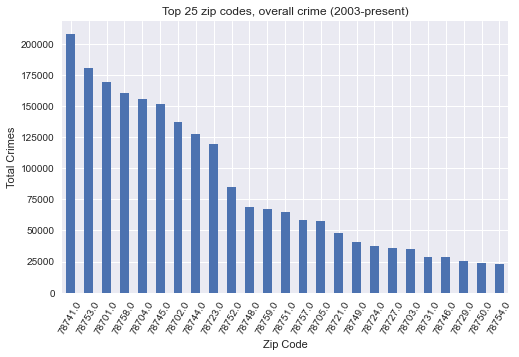

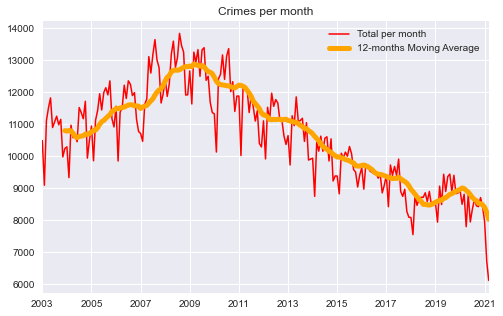

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231845
THEFT                             212734
FAMILY DISTURBANCE                180937
CRIMINAL MISCHIEF                 128247
ASSAULT W/INJURY-FAM/DATE VIOL     78546
BURGLARY OF RESIDENCE              77372
DWI                                69914
PUBLIC INTOXICATION                68877
HARASSMENT                         64656
DISTURBANCE - OTHER                61972
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,HARASSMENT,ASSAULT W/INJURY-FAM/DATE VIOL,CRIMINAL MISCHIEF,BURGLARY OF RESIDENCE,PUBLIC INTOXICATION,DWI,FAMILY DISTURBANCE,TOTAL
occurred_date,,,,,,,,,
2020-11-30,483,239,283,507,162,71,184,864,2793
2020-12-31,409,249,253,477,187,50,165,825,2615
2021-01-31,362,248,256,432,127,55,168,815,2463
2021-02-28,314,165,242,335,117,62,132,811,2178
2021-03-31,368,146,205,293,130,56,153,435,1786


<Figure size 432x288 with 0 Axes>

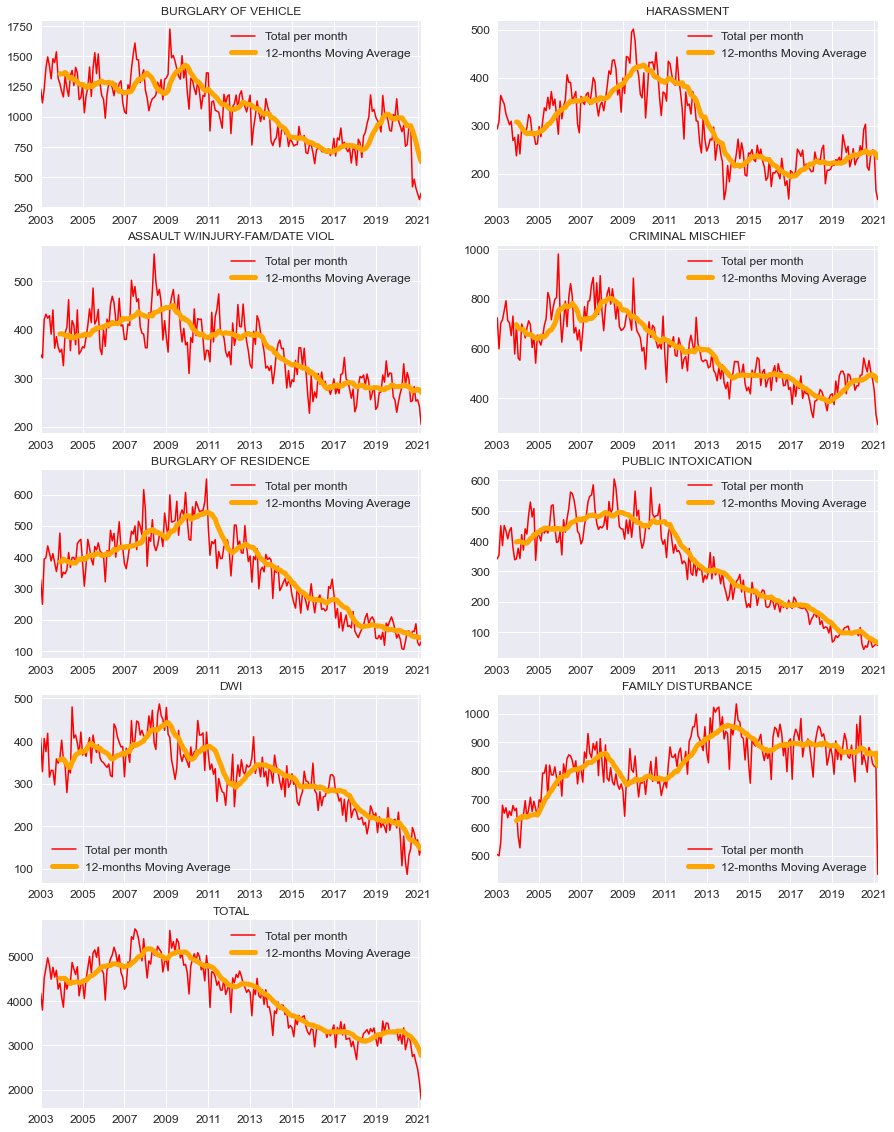

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17174
THEFT                             15851
BURGLARY OF VEHICLE                9299
WARRANT ARREST NON TRAFFIC         8965
DWI                                8350
ASSAULT WITH INJURY                7571
VIOL CITY ORDINANCE - OTHER        6188
POSS OF DRUG PARAPHERNALIA         6061
CRIMINAL MISCHIEF                  5854
CRIMINAL TRESPASS                  3935
POSSESSION OF MARIJUANA            3397
DISTURBANCE - OTHER                3373
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2912
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2607
CRIMINAL TRESPASS/TRANSIENT        2590
THEFT OF BICYCLE                   2527
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2184
DOC FIGHTING                       2121
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1740
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101463
THEFT                             0.093647
BURGLARY OF VEHICLE               0.054938
WARRANT ARREST NON TRAFFIC        0.052965
DWI                               0.049332
ASSAULT WITH INJURY               0.044729
VIOL CITY ORDINANCE - OTHER       0.036558
POSS OF DRUG PARAPHERNALIA        0.035808
CRIMINAL MISCHIEF                 0.034585
CRIMINAL TRESPASS                 0.023248
POSSESSION OF MARIJUANA           0.020069
DISTURBANCE - OTHER               0.019928
CUSTODY ARREST TRAFFIC WARR       0.017683
POSS CONTROLLED SUB/NARCOTIC      0.017204
CAMPING IN PARK                   0.016454
VOCO - ALCOHOL  CONSUMPTION       0.015892
ASSAULT BY CONTACT                0.015402
CRIMINAL TRESPASS/TRANSIENT       0.015302
THEFT OF BICYCLE                  0.014929
URINATING IN PUBLIC PLACE         0.013801
FAMILY DISTURBANCE                0.012903
DOC FIGHTING                      0.012531
PROTECTIVE ORDER                  0.012401
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

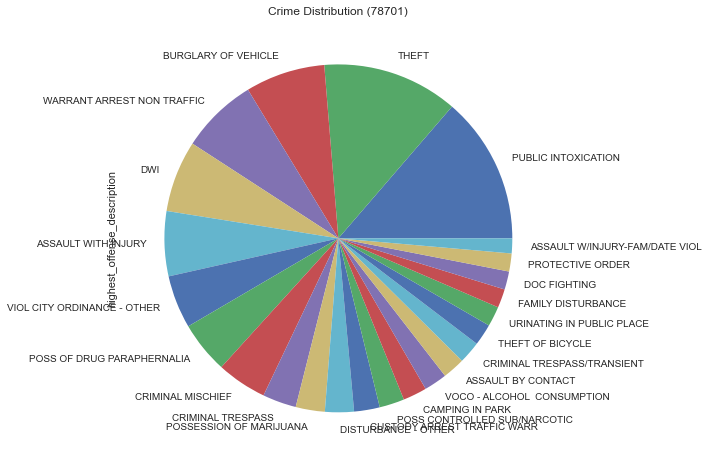

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17221
BURGLARY OF VEHICLE               15997
FAMILY DISTURBANCE                14772
CRIMINAL MISCHIEF                  9520
THEFT BY SHOPLIFTING               7674
ASSAULT W/INJURY-FAM/DATE VIOL     7210
BURGLARY OF RESIDENCE              6092
DWI                                5067
DISTURBANCE - OTHER                4796
CUSTODY ARREST TRAFFIC WARR        4353
AUTO THEFT                         4280
HARASSMENT                         4279
POSS OF DRUG PARAPHERNALIA         3736
PUBLIC INTOXICATION                3379
ASSAULT WITH INJURY                3342
CRIMINAL TRESPASS                  3166
POSS CONTROLLED SUB/NARCOTIC       2999
RUNAWAY CHILD                      2947
WARRANT ARREST NON TRAFFIC         2803
POSSESSION OF MARIJUANA            2716
BURGLARY NON RESIDENCE             2501
VIOL CITY ORDINANCE - OTHER        1873
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

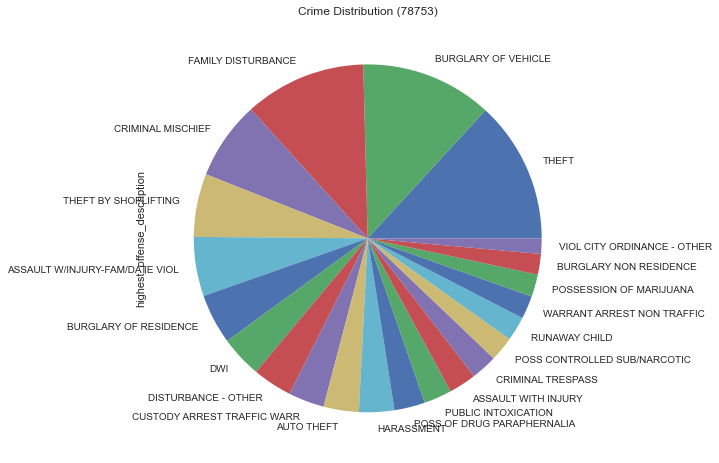

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20476
BURGLARY OF VEHICLE               19857
THEFT                             15661
CRIMINAL MISCHIEF                 11098
ASSAULT W/INJURY-FAM/DATE VIOL     9667
BURGLARY OF RESIDENCE              8903
PUBLIC INTOXICATION                6390
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5687
HARASSMENT                         5557
DISTURBANCE - OTHER                5186
AUTO THEFT                         4683
ASSAULT WITH INJURY                4558
CRIMINAL TRESPASS                  3941
POSS CONTROLLED SUB/NARCOTIC       3886
POSSESSION OF MARIJUANA            3799
THEFT BY SHOPLIFTING               3589
POSS OF DRUG PARAPHERNALIA         3544
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2800
VIOL CITY ORDINANCE - OTHER        2197
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098433
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

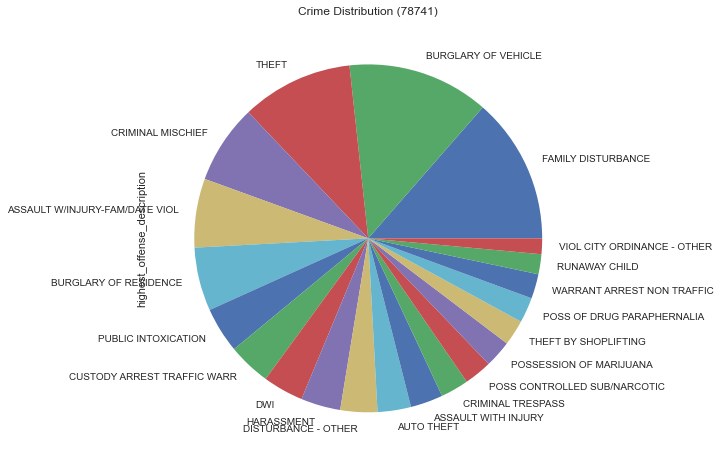

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15052
BURGLARY OF VEHICLE               14774
THEFT                             13623
CRIMINAL MISCHIEF                  8566
BURGLARY OF RESIDENCE              5878
ASSAULT W/INJURY-FAM/DATE VIOL     5784
HARASSMENT                         5169
DISTURBANCE - OTHER                4545
DWI                                4436
PUBLIC INTOXICATION                4009
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2884
AUTO THEFT                         2881
ASSAULT WITH INJURY                2694
RUNAWAY CHILD                      2610
POSSESSION OF MARIJUANA            2594
WARRANT ARREST NON TRAFFIC         2109
POSS CONTROLLED SUB/NARCOTIC       2041
THEFT BY SHOPLIFTING               2004
CRIMINAL TRESPASS                  1968
IDENTITY THEFT                     1610
POSS OF DRUG PARAPHERNALIA         1526
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

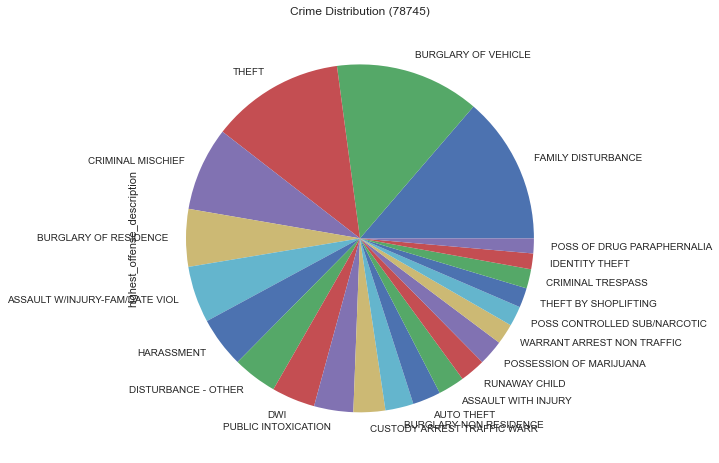

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8670
THEFT                             5639
CRIMINAL MISCHIEF                 4987
THEFT OF BICYCLE                  3506
PUBLIC INTOXICATION               2626
BURGLARY OF RESIDENCE             2128
WARRANT ARREST NON TRAFFIC        1548
CRIMINAL TRESPASS                 1357
AUTO THEFT                        1343
ASSAULT WITH INJURY               1263
HARASSMENT                        1223
DWI                               1214
FAMILY DISTURBANCE                1205
DISTURBANCE - OTHER               1123
BURGLARY NON RESIDENCE             884
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        791
GRAFFITI                           782
CUSTODY ARREST TRAFFIC WARR        780
ASSAULT W/INJURY-FAM/DATE VIOL     703
POSSESSION OF MARIJUANA            658
ASSAULT BY CONTACT                 624
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150628
THEFT                             0.097969
CRIMINAL MISCHIEF                 0.086642
THEFT OF BICYCLE                  0.060911
PUBLIC INTOXICATION               0.045623
BURGLARY OF RESIDENCE             0.036971
WARRANT ARREST NON TRAFFIC        0.026894
CRIMINAL TRESPASS                 0.023576
AUTO THEFT                        0.023333
ASSAULT WITH INJURY               0.021943
HARASSMENT                        0.021248
DWI                               0.021091
FAMILY DISTURBANCE                0.020935
DISTURBANCE - OTHER               0.019510
BURGLARY NON RESIDENCE            0.015358
CRIMINAL TRESPASS/TRANSIENT       0.015080
VIOL CITY ORDINANCE - OTHER       0.013742
GRAFFITI                          0.013586
CUSTODY ARREST TRAFFIC WARR       0.013551
ASSAULT W/INJURY-FAM/DATE VIOL    0.012214
POSSESSION OF MARIJUANA           0.011432
ASSAULT BY CONTACT                0.010841
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

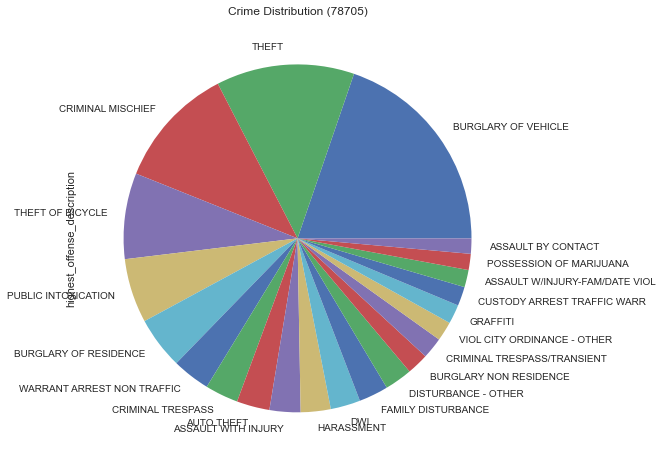

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5408
THEFT                             5101
THEFT BY SHOPLIFTING              2549
CRIMINAL MISCHIEF                 1276
DWI                                882
FAMILY DISTURBANCE                 764
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         632
AUTO THEFT                         609
BURGLARY OF RESIDENCE              522
THEFT FROM PERSON                  462
IDENTITY THEFT                     442
DISTURBANCE - OTHER                433
BURGLARY NON RESIDENCE             357
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            327
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            297
FRAUD - OTHER                      281
SUSPICIOUS PERSON                  259
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                198
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191122
THEFT                             0.180273
THEFT BY SHOPLIFTING              0.090083
CRIMINAL MISCHIEF                 0.045095
DWI                               0.031170
FAMILY DISTURBANCE                0.027000
VIOL CITY ORDINANCE - OTHER       0.023042
HARASSMENT                        0.022335
AUTO THEFT                        0.021522
BURGLARY OF RESIDENCE             0.018448
THEFT FROM PERSON                 0.016327
IDENTITY THEFT                    0.015621
DISTURBANCE - OTHER               0.015303
BURGLARY NON RESIDENCE            0.012617
ASSAULT W/INJURY-FAM/DATE VIOL    0.012016
CRED CARD ABUSE - OTHER           0.011556
PUBLIC INTOXICATION               0.011344
POSSESSION OF MARIJUANA           0.010496
FRAUD - OTHER                     0.009931
SUSPICIOUS PERSON                 0.009153
CUSTODY ARREST TRAFFIC WARR       0.008729
WARRANT ARREST NON TRAFFIC        0.007881
ASSAULT WITH INJURY               0.006997
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

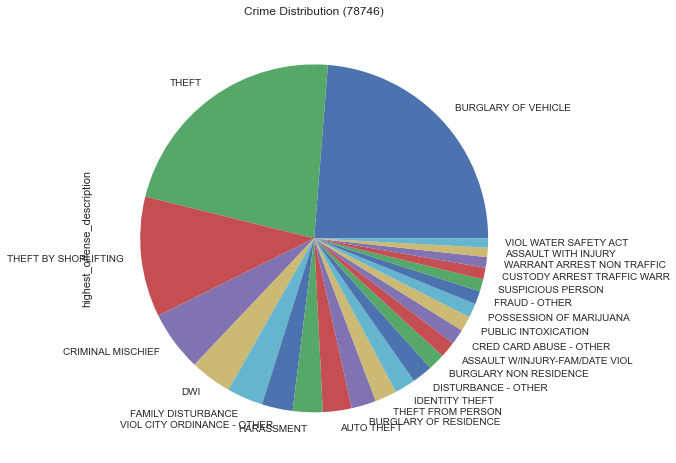

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130604
78753.0    0.099195
78758.0    0.094327
78701.0    0.074853
78723.0    0.074380
78702.0    0.074008
78745.0    0.057847
78752.0    0.052370
78744.0    0.051897
78704.0    0.048245
78721.0    0.027791
78724.0    0.024511
78705.0    0.021502
78757.0    0.020725
78748.0    0.017445
78751.0    0.017074
78759.0    0.013760
78722.0    0.009466
78754.0    0.008385
78727.0    0.007945
78749.0    0.007844
78617.0    0.007675
78729.0    0.007134
78750.0    0.005781
78731.0    0.005240
Name: zip_code, dtype: float64

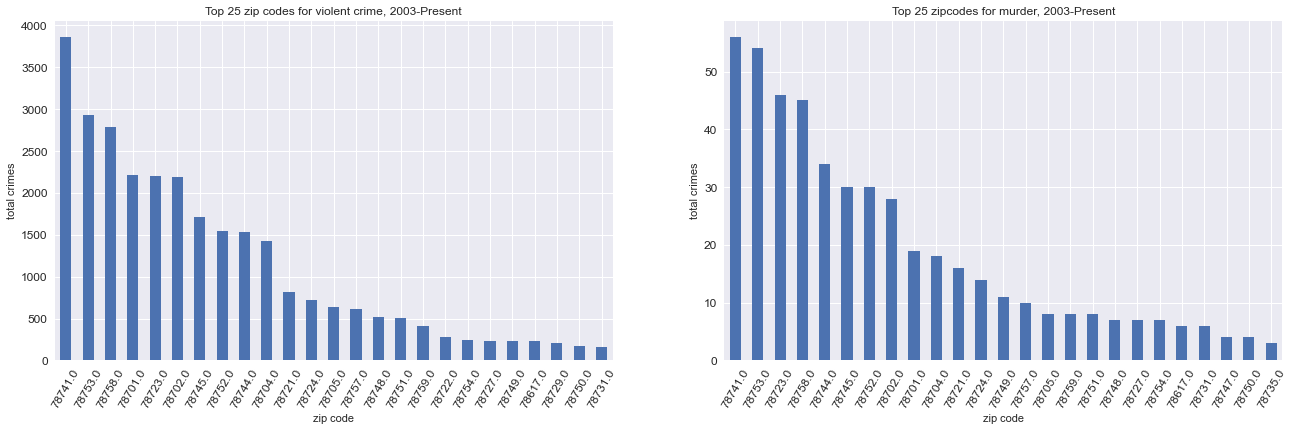

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,7
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,29,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

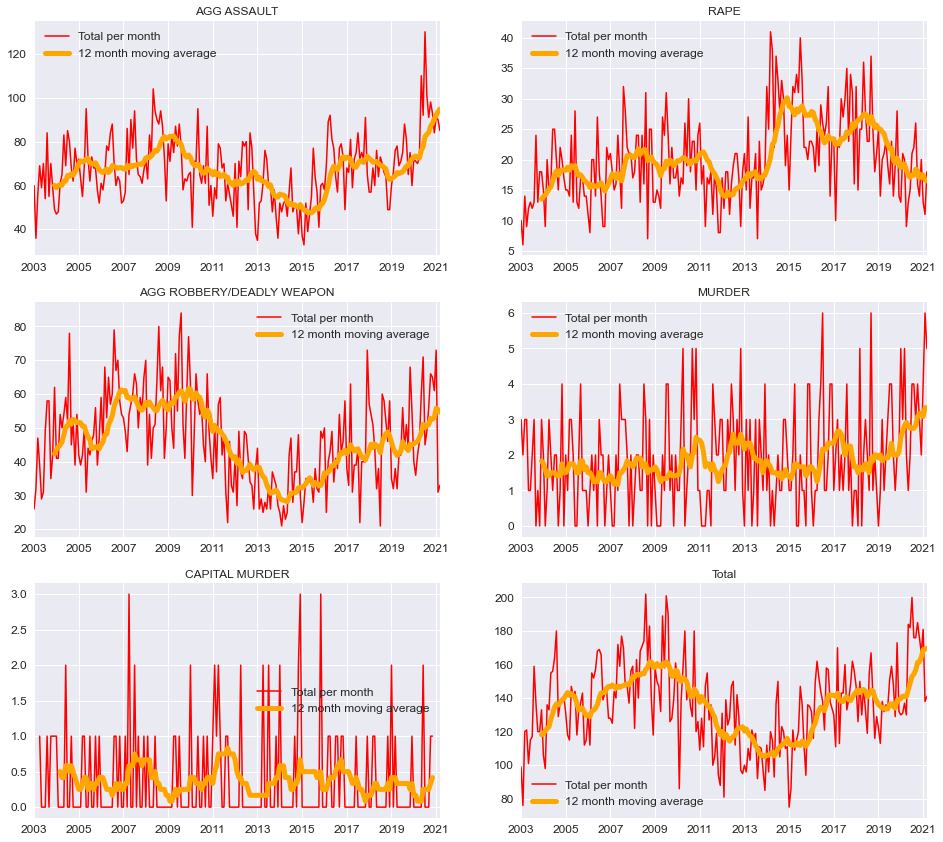

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

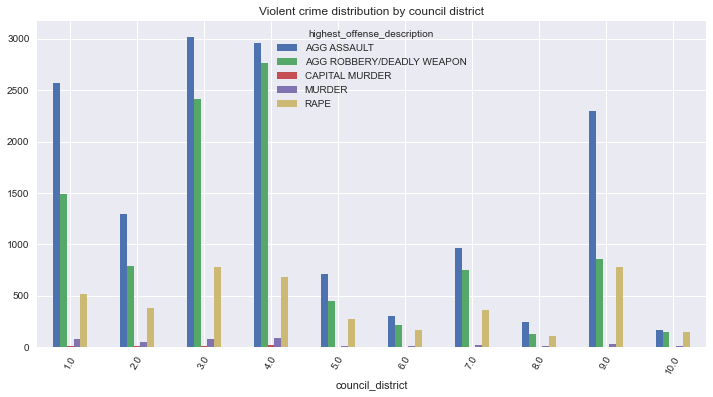

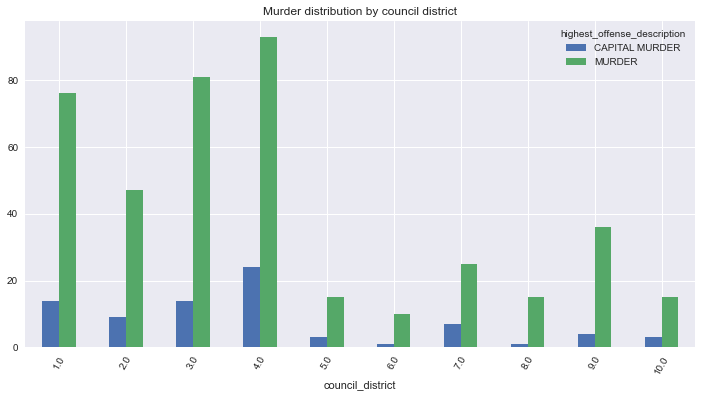

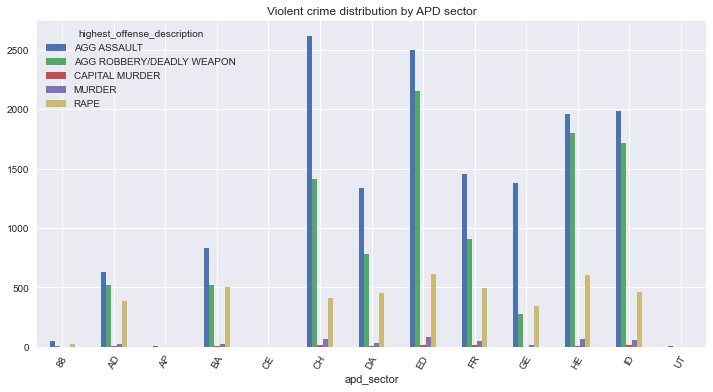

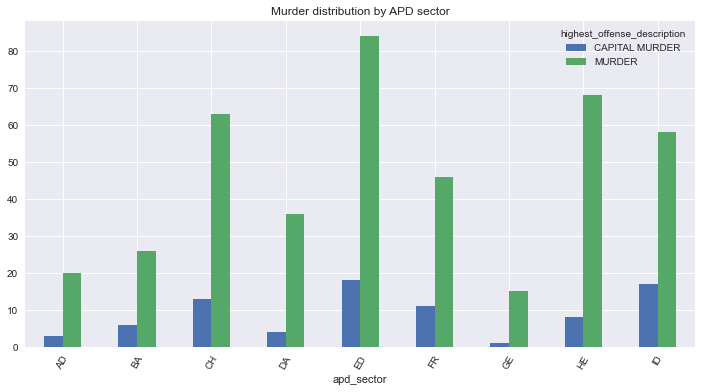

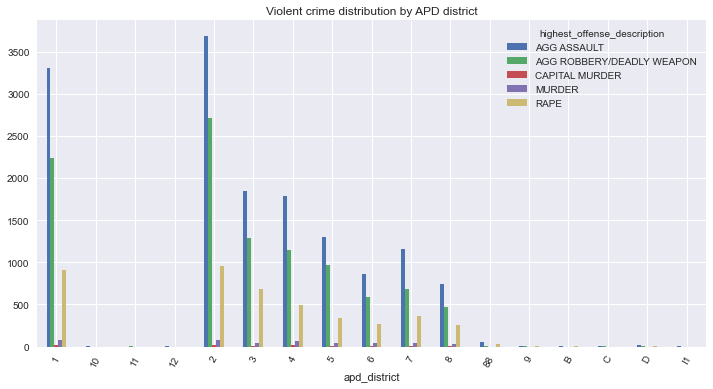

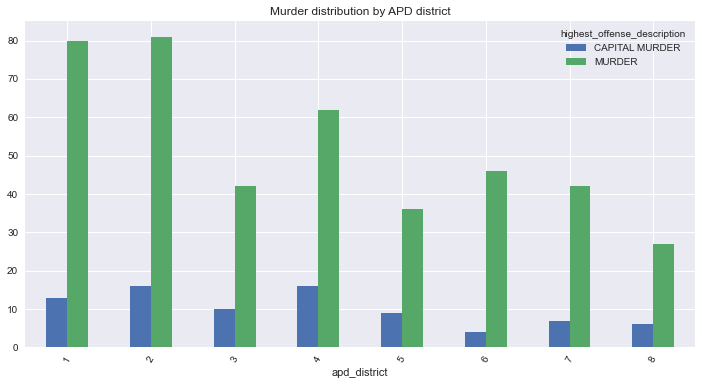

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,14,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,667,46,2,8,79
CAMP / CAMPGROUND,23,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


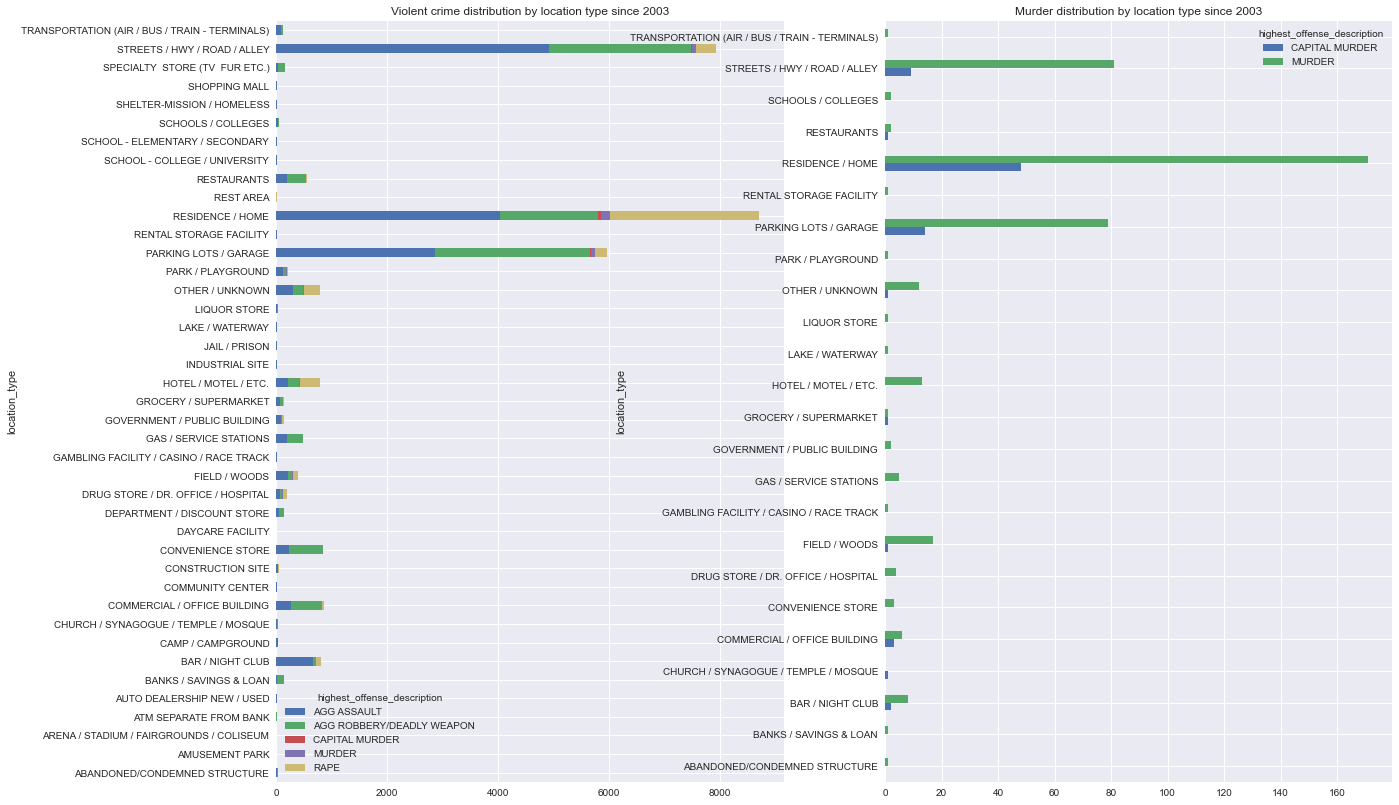

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50)

4110 GUADALUPE ST                 11555
1030 NORWOOD PARK BLVD             9217
2901 S CAPITAL OF TEXAS HWY NB     8124
3600 PRESIDENTIAL BLVD             7359
500 E 7TH ST                       6114
1000 E 41ST ST                     5822
3708 S 2ND ST                      5255
2508 E RIVERSIDE DR                4830
11200 LAKELINE MALL DR             4504
9300 S IH 35 SVRD SB               4069
715 E 8TH ST                       4002
9414 N LAMAR BLVD                  3869
1137 GUNTER ST                     3203
710 E BEN WHITE BLVD SVRD WB       3197
6001 AIRPORT BLVD                  2923
12900 N IH 35 SVRD SB              2814
5800 TECHNI CENTER DR              2747
5901 AIRPORT BLVD                  2718
2701 E 7TH ST                      2715
6118 FAIRWAY ST                    2669
1300 CROSSING PL                   2636
1515 WICKERSHAM LN                 2443
6409 SPRINGDALE RD                 2439
2400 S CONGRESS AVE                2436
601 E 15TH ST                      2362


In [24]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
00 BLOCK UNKNOWN            59
6409 SPRINGDALE RD          59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         56
1030 NORWOOD PARK BLVD      53
1071 CLAYTON LN             53
9200 NORTH PLZ              53
6103 MANOR RD               52
2237 E RIVERSIDE DR         51
1137 GUNTER ST              51
Name: address, dtype: int64

In [25]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

8610 N LAMAR BLVD            3
6409 SPRINGDALE RD           3
6407 SPRINGDALE RD           3
4700 E RIVERSIDE DR          3
8800 N IH 35 SVRD SB         3
1137 GUNTER ST               2
1711 RUTLAND DR              2
9601 MIDDLE FISKVILLE RD     2
2915 S IH 35 SVRD NB         2
8912 N LAMAR BLVD            2
9220 N IH 35 SVRD SB         2
833 FAIRFIELD DR             2
8225 SAM RAYBURN DR          2
10610 MORADO CIR             2
601 E 15TH ST                2
815 W SLAUGHTER LN           2
605 MASTERSON PASS           2
6600 ED BLUESTEIN BLVD SB    2
9010 GALEWOOD DR             2
744 W WILLIAM CANNON DR      2
9200 NORTH PLZ               2
2501 ANKEN DR                2
2508 E RIVERSIDE DR          2
2713 S CONGRESS AVE          2
201 W 5TH ST                 2
1050 SPRINGDALE RD           2
2400 WICKERSHAM LN           2
6118 FAIRWAY ST              2
10503 N LAMAR BLVD           2
7000 DECKER LN               2
Name: address, dtype: int64

In [26]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")